<a href="https://colab.research.google.com/github/Biswamitra4599/MRI_Literature_Review/blob/main/MRI_Recon_normal_rss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RSS

## Importing System Libraries & Mounting Drive


In [1]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import Image
import h5py
import glob
import shutil
import subprocess

In [2]:
#Mounting Google Drive
from google.colab import drive
# !rm -rf drive

drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
def delete_path(path_to_delete):
  if os.path.exists(path_to_delete) and os.path.isdir(path_to_delete):
    try:
      # Force delete the directory and all its contents
      shutil.rmtree(path_to_delete)
      print(f"Directory '{path_to_delete}' and all its contents have been deleted.")
    except Exception as e:
      print(f"Error while deleting the directory: {e}")
  else:
    print(f"The directory '{path_to_delete}' does not exist.")

def create_path(path_to_create):
  if not os.path.exists(path_to_create):
    os.makedirs(path_to_create)
    print(f"Path Created!!! Put the '.h5' files in the specific place: {path_to_create}")
  else:
    print("Path Already Exists!!")

In [4]:
# Remove an empty directory
mri_path="/content/drive/MyDrive/MRI/"
cfl_path=mri_path+"CFL/"
buffer_path=mri_path+"BUFFER/"
h5_path=mri_path+"H5/"
test_path=mri_path+"TEST/"
# Clearning the Buffer if exixts
delete_path(buffer_path)
bash_path=mri_path+"BASH/"

The directory '/content/drive/MyDrive/MRI/BUFFER/' does not exist.


In [5]:
# Managing the Paths to avoid any Error
if not os.path.exists(mri_path):
  os.makedirs(mri_path)
  os.makedirs(cfl_path)
  os.makedirs(buffer_path)
  os.makedirs(h5_path)
  os.makedirs(test_path)
  print(f"Path Created!!! Put the '.h5' files in the specific place: {h5_path}")
else:
  os.makedirs(buffer_path)
  print("Path Already Exists!!")


Path Already Exists!!


## Finalized Functions::

### Loading  the files

In [6]:
# Get a list of all .h5 files in the directory
def get_file_list():
    h5_files = glob.glob(os.path.join(h5_path, "*.h5"))
    ll=[]

    for h5_file in h5_files:
      temp=h5_file.replace(h5_path,"")
      temp=temp.replace(".h5","")
      ll.append(temp)
    return ll


#Getting User Input on Image
def get_user_input(ll):
    for index,tt in enumerate(ll):
      print(index,":\t", tt)
    print("\nEnter the index of the file name from the above list: ")
    ins = input()
    return int(ins)


#Extracting Volume K Space for specified Image.
def get_volume_kspace(h5_file_name):
    hf= h5py.File(h5_file_name)
    volume_kspace = hf['kspace'][()]
    return volume_kspace


def process_h5_file(h5_file_name, slice_no):
    h5_file_path=h5_path+h5_file_name+".h5"
    h5_file_cfl_dict=cfl_path+h5_file_name+"/"
    create_path(h5_file_cfl_dict)

    #Getting the Volume K Space Data
    volume_kspace = get_volume_kspace(h5_file_path)
    print("H5 five file size:",volume_kspace.shape)
    slice_nos=volume_kspace.shape[0]
    print("No of slices are:",slice_nos)
    print("*****\tFor Slice No.: ",slice_no,"\t*********")

    # Extracting Slice from volume K Space
    slice_kspace = volume_kspace[slice_no]
    print("Slice K-Space size: ",slice_kspace.shape)

In [7]:
# H5 File Reading
h5_file_list=get_file_list()
ins=get_user_input(h5_file_list)
h5_file_name=h5_file_list[int(ins)]
print(h5_file_name)

0 :	 file_brain_AXFLAIR_200_6002452
1 :	 file_brain_AXFLAIR_200_6002467
2 :	 file_brain_AXT1POST_201_6002673
3 :	 file_brain_AXT2_210_6001944
4 :	 sc_file1000001
5 :	 sc_file1000022

Enter the index of the file name from the above list: 
3
file_brain_AXT2_210_6001944


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt

# =======================
# Paths
# =======================
h5_file_path = h5_path + h5_file_name + ".h5"
output_root = cfl_path + h5_file_name + "/kspace_plots/"

os.makedirs(output_root, exist_ok=True)

# =======================
# Load volume k-space
# =======================
volume_kspace = get_volume_kspace(h5_file_path)
print("H5 file size:", volume_kspace.shape)

num_slices = volume_kspace.shape[0]
num_coils = volume_kspace.shape[1]

print("No of slices:", num_slices)
print("No of coils:", num_coils)

# =======================
# Function to save k-space plots
# =======================
def save_kspace_plots(volume_kspace, output_root, cmap='gray'):
    """
    Saves normalized k-space magnitude images slice-wise and coil-wise.

    Args:
        volume_kspace (np.ndarray):
            Shape -> (num_slices, num_coils, H, W)
        output_root (str):
            Root directory to save images
        cmap (str):
            Colormap for visualization
    """
    num_slices, num_coils = volume_kspace.shape[:2]

    for slice_idx in range(num_slices):
        print(f"Processing Slice {slice_idx}")

        # Create slice folder
        slice_dir = os.path.join(output_root, f"slice_{slice_idx:03d}")
        os.makedirs(slice_dir, exist_ok=True)

        slice_kspace = volume_kspace[slice_idx]

        for coil_idx in range(num_coils):
            # Magnitude
            kspace_mag = np.abs(slice_kspace[coil_idx])

            # Log normalization
            kspace_log = np.log(kspace_mag + 1e-9)

            # Optional min-max normalization (for consistent brightness)
            kspace_log = (kspace_log - kspace_log.min()) / (
                kspace_log.max() - kspace_log.min() + 1e-9
            )

            # Plot
            plt.figure(figsize=(6, 6))
            plt.imshow(kspace_log, cmap=cmap)
            plt.axis("off")
            plt.title(f"Slice {slice_idx} | Coil {coil_idx+1}")

            # Save
            save_path = os.path.join(
                slice_dir, f"coil_{coil_idx+1:02d}.png"
            )
            plt.savefig(save_path, bbox_inches="tight", pad_inches=0)
            plt.close()

# =======================
# Run
# =======================
save_kspace_plots(volume_kspace, output_root)


H5 file size: (16, 20, 768, 396)
No of slices: 16
No of coils: 20
Processing Slice 0
Processing Slice 1
Processing Slice 2
Processing Slice 3
Processing Slice 4
Processing Slice 5
Processing Slice 6
Processing Slice 7
Processing Slice 8
Processing Slice 9
Processing Slice 10
Processing Slice 11
Processing Slice 12
Processing Slice 13
Processing Slice 14
Processing Slice 15


### Plot the k space images but normalize the distribution of data for better inference


### Reconstruction

In [15]:
import numpy as np

def reconstruct_slice_kspace(slice_kspace):
    """
    Reconstructs a single slice from multi-coil k-space using
    IFFT + Root Sum of Squares (RSS)

    Args:
        slice_kspace (np.ndarray):
            Shape -> (num_coils, H, W)

    Returns:
        np.ndarray:
            Reconstructed magnitude image (H, W)
    """
    num_coils = slice_kspace.shape[0]
    coil_images = []

    for i in range(num_coils):
        img = np.fft.ifft2(slice_kspace[i])
        img = np.fft.fftshift(img)
        coil_images.append(img)

    coil_images = np.array(coil_images)

    # Root Sum of Squares
    combined_image = np.sqrt(np.sum(np.abs(coil_images) ** 2, axis=0))

    return combined_image


In [16]:
import os
import matplotlib.pyplot as plt
from matplotlib import cm

# =======================
# Output directory
# =======================
recon_output_dir = cfl_path + h5_file_name + "/reconstructed_images/"
os.makedirs(recon_output_dir, exist_ok=True)

# =======================
# Loop over slices
# =======================
for slice_idx in range(slice_nos):
    print(f"Reconstructing Slice {slice_idx}")

    slice_kspace = volume_kspace[slice_idx]
    reconstructed_image = reconstruct_slice_kspace(slice_kspace)

    # Normalize for visualization
    recon_norm = reconstructed_image / (np.max(reconstructed_image) + 1e-9)

    # Plot (no display)
    plt.figure(figsize=(6, 6))
    plt.imshow(recon_norm, cmap=cm.gray)
    plt.axis("off")
    plt.title(f"Reconstructed Slice {slice_idx}")

    # Save
    save_path = os.path.join(
        recon_output_dir, f"slice_{slice_idx:03d}.png"
    )
    plt.savefig(save_path, bbox_inches="tight", pad_inches=0)
    plt.close()


Reconstructing Slice 0
Reconstructing Slice 1
Reconstructing Slice 2
Reconstructing Slice 3
Reconstructing Slice 4
Reconstructing Slice 5
Reconstructing Slice 6
Reconstructing Slice 7
Reconstructing Slice 8
Reconstructing Slice 9
Reconstructing Slice 10
Reconstructing Slice 11
Reconstructing Slice 12
Reconstructing Slice 13
Reconstructing Slice 14
Reconstructing Slice 15


In [18]:
def center_crop(img, crop_h=396, crop_w=396):
    """
    Center crop a 2D image.

    Args:
        img (np.ndarray): 2D image (H, W)
        crop_h (int): crop height
        crop_w (int): crop width

    Returns:
        np.ndarray: Center-cropped image
    """
    h, w = img.shape
    start_h = (h - crop_h) // 2
    start_w = (w - crop_w) // 2

    return img[start_h:start_h + crop_h, start_w:start_w + crop_w]


In [32]:
import os
import matplotlib.pyplot as plt
from matplotlib import cm

# =======================
# Output directories
# =======================
recon_output_dir = cfl_path + h5_file_name + "/reconstructed_images/"
crop_output_dir  = cfl_path + h5_file_name + "/reconstructed_images_cropped_396/"

os.makedirs(recon_output_dir, exist_ok=True)
os.makedirs(crop_output_dir, exist_ok=True)

# =======================
# Loop over slices
# =======================
for slice_idx in range(slice_nos):
    print(f"Processing Slice {slice_idx}")

    slice_kspace = volume_kspace[slice_idx]

    # Reconstruct
    reconstructed_image = reconstruct_slice_kspace(slice_kspace)

    # Normalize (for visualization only)
    recon_norm = reconstructed_image / (np.max(reconstructed_image) + 1e-9)

    # ---------- Save full reconstruction ----------
    plt.figure(figsize=(6, 6))
    plt.imshow(recon_norm, cmap=cm.gray)
    plt.axis("off")

    full_save_path = os.path.join(
        recon_output_dir, f"slice_{slice_idx:03d}.png"
    )
    plt.savefig(full_save_path, bbox_inches="tight", pad_inches=0)
    plt.close()

    # ---------- Center crop ----------
    cropped_img = center_crop(recon_norm, 396, 396)

    # ---------- Save cropped reconstruction ----------
    plt.figure(figsize=(6, 6))
    plt.imshow(cropped_img, cmap=cm.gray)
    plt.axis("off")

    crop_save_path = os.path.join(
        crop_output_dir, f"slice_{slice_idx:03d}.png"
    )
    plt.savefig(crop_save_path, bbox_inches="tight", pad_inches=0)
    plt.close()


Processing Slice 0
Processing Slice 1
Processing Slice 2
Processing Slice 3
Processing Slice 4
Processing Slice 5
Processing Slice 6
Processing Slice 7
Processing Slice 8
Processing Slice 9
Processing Slice 10
Processing Slice 11
Processing Slice 12
Processing Slice 13
Processing Slice 14
Processing Slice 15


## asfed


In [36]:
# def create_cartesian_mask(shape, accel=4, center_fraction=0.08):
#     """
#     Create Cartesian undersampling mask

#     Args:
#         shape (tuple): (H, W)
#         accel (int): Acceleration factor (e.g., 4)
#         center_fraction (float): Fully sampled center

#     Returns:
#         np.ndarray: mask (H, W)
#     """
#     H, W = shape
#     mask = np.zeros((H, W), dtype=np.float32)

#     # Fully sampled center
#     num_center = int(H * center_fraction)
#     center_start = (H - num_center) // 2
#     center_end = center_start + num_center
#     mask[center_start:center_end, :] = 1

#     # Undersampled outer lines
#     prob = (H / accel - num_center) / (H - num_center)
#     for i in range(H):
#         if i < center_start or i >= center_end:
#             if np.random.rand() < prob:
#                 mask[i, :] = 1

#     return mask


import numpy as np

def create_cartesian_mask(shape, accel=4, center_fraction=0.00):
    """
    Create UNIFORM HORIZONTAL Cartesian undersampling mask

    Args:
        shape (tuple): (H, W)
        accel (int): Acceleration factor
        center_fraction (float): Fully sampled center (along W)

    Returns:
        np.ndarray: mask (H, W)
    """
    H, W = shape
    mask = np.zeros((H, W), dtype=np.float32)

    # Fully sampled center columns
    num_center = int(W * center_fraction)
    center_start = (W - num_center) // 2
    center_end = center_start + num_center
    mask[:, center_start:center_end] = 1

    # Uniform undersampling of outer columns
    stride = accel
    for j in range(0, W, stride):
        if j < center_start or j >= center_end:
            mask[:, j] = 1

    return mask


In [34]:
def apply_kspace_mask(slice_kspace, mask):
    """
    Apply mask to multi-coil k-space

    Args:
        slice_kspace: (num_coils, H, W)
        mask: (H, W)

    Returns:
        masked_kspace
    """
    return slice_kspace * mask[None, :, :]


In [23]:
def normalize_kspace_for_display(kspace):
    mag = np.abs(kspace)
    log_mag = np.log(mag + 1e-9)
    return (log_mag - log_mag.min()) / (log_mag.max() - log_mag.min() + 1e-9)


In [26]:
def center_crop(img, crop_h=396, crop_w=396):
    h, w = img.shape
    sh = (h - crop_h) // 2
    sw = (w - crop_w) // 2
    return img[sh:sh + crop_h, sw:sw + crop_w]


In [29]:
import os
import matplotlib.pyplot as plt
from matplotlib import cm

base_out = cfl_path + h5_file_name + "/output/"
dirs = {
    "mask": base_out + "masks_4x/",
    "kspace": base_out + "kspace_masked_norm/",
    "recon": base_out + "recon_full/",
    "crop": base_out + "recon_cropped_264/"
}

for d in dirs.values():
    os.makedirs(d, exist_ok=True)

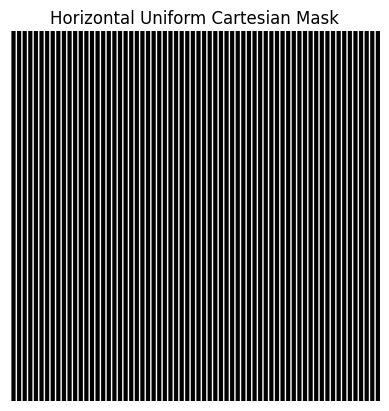

In [37]:
import matplotlib.pyplot as plt

mask = create_cartesian_mask((264, 264), accel=4)
plt.imshow(mask, cmap="gray")
plt.title("Horizontal Uniform Cartesian Mask")
plt.axis("off")
plt.show()


In [38]:
for slice_idx in range(slice_nos):
    print(f"Processing slice {slice_idx}")

    slice_kspace = volume_kspace[slice_idx]
    num_coils, H, W = slice_kspace.shape

    # ---------- Mask ----------
    mask = create_cartesian_mask((H, W), accel=4)
    masked_kspace = apply_kspace_mask(slice_kspace, mask)

    # Save mask
    np.save(dirs["mask"] + f"slice_{slice_idx:03d}.npy", mask)
    plt.imsave(dirs["mask"] + f"slice_{slice_idx:03d}.png", mask, cmap="gray")

    # ---------- Save masked k-space ----------
    slice_k_dir = dirs["kspace"] + f"slice_{slice_idx:03d}/"
    os.makedirs(slice_k_dir, exist_ok=True)

    for c in range(num_coils):
        ks_norm = normalize_kspace_for_display(masked_kspace[c])
        plt.imsave(slice_k_dir + f"coil_{c+1:02d}.png", ks_norm, cmap="gray")

    # ---------- Reconstruction ----------
    recon_img = reconstruct_slice_kspace(masked_kspace)
    recon_norm = recon_img / (np.max(recon_img) + 1e-9)

    plt.imsave(
        dirs["recon"] + f"slice_{slice_idx:03d}.png",
        recon_norm,
        cmap=cm.gray
    )

    # ---------- Crop ----------
    recon_crop = center_crop(recon_norm, 396, 396)

    plt.imsave(
        dirs["crop"] + f"slice_{slice_idx:03d}.png",
        recon_crop,
        cmap=cm.gray
    )


Processing slice 0
Processing slice 1
Processing slice 2
Processing slice 3
Processing slice 4
Processing slice 5
Processing slice 6
Processing slice 7
Processing slice 8
Processing slice 9
Processing slice 10
Processing slice 11
Processing slice 12
Processing slice 13
Processing slice 14
Processing slice 15
